## EE 242 Lab 2a – Convolution - Convolving and Smoothing

Author names go here 

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [2]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt
# import whatever other modules you use in this lab -- there are more that you need than we've included 


## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week lab.  You should plan on completing the first 2 assignments in the first week.

## Lab 2a turn in checklist

•	Lab 2a Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)




## Assignment 1 -- Convolving Simple Signals

We will start by doing some simple convolutions similar to what you saw in class. Create a new cell in your Lab 2 notebook for Assignment 1. This assignment will have three parts, A-C.

**A.** Create the following three discrete-time signals, assuming a time range of [0,12].  
x = a box of height 1 starting at time n=2 and ending at n=8  
h1 = a pulse of length 4 & height 1 starting at time 0  
h2 = 1 at n=0, -1 at n=1, and 0 otherwise  

**B.**  Use numpy.convolve() function to find y1=$x*h1$ and y2=$x*h2$ (where $*$ indicates convolution, not multiplication).

**C.**  Create a time vectors nx, ny1 and ny2 for plotting x, y1 and y2. Use the stem plotting function to plot the signals on a 3x1 subplot, using a y-axis between -2 and 5 and a time axis from 0 to 20. Label and title the graphs. Verify that the signals for (y1) and (y2) match what you expect from your prelab. 

13
13
13
25
25
[0 0 1 2 3 4 5 5 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0]
[ 0  0  1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]


<IPython.core.display.Javascript object>


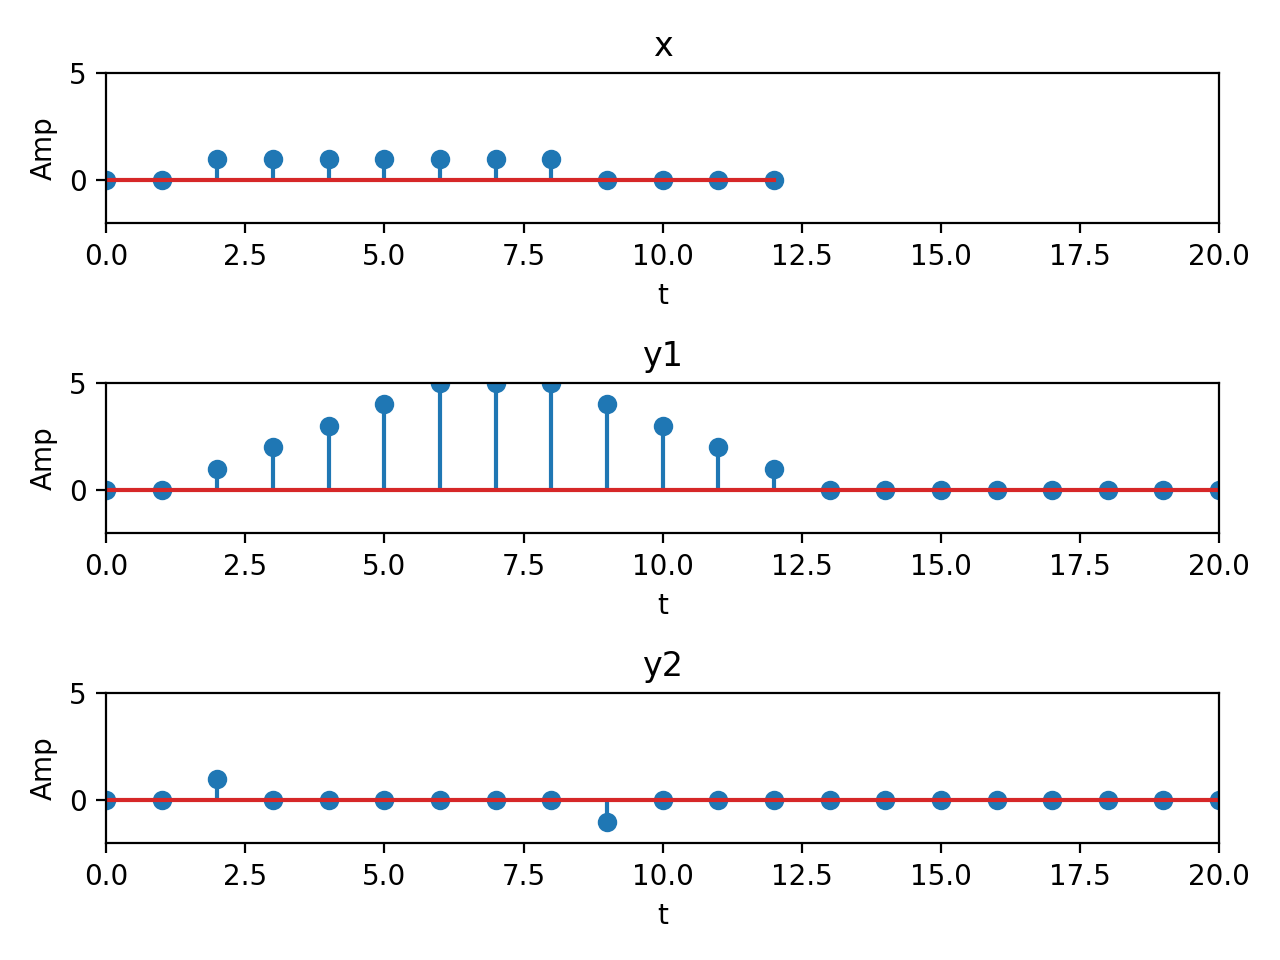

Text(0, 0.5, 'Amp')

In [80]:
# Assignment 1 - Time Scaling Function

# Part A

# Create three discrete-time signals, assuming a time range of [0,12]
# x: input signal vector, a box of height 1 starting at time n=2 and ending at n=8
x = np.array([0,0,1,1,1,1,1,1,1,0,0,0,0])

# h1: a pulse of length 4 & height 1 starting at time 0
h1 = np.array([1,1,1,1,1,0,0,0,0,0,0,0,0])
# h2 = 1 at n=0, -1 at n=1, and 0 otherwise
h2 = np.array([1,-1,0,0,0,0,0,0,0,0,0,0,0])

# Prints the size of arrays which equal 13
print(x.size)
print(h1.size)
print(h2.size)

# Part B
# Find the responses y1=x*h1 and y2=x*h2
y1 = np.convolve(x, h1, mode = 'full')
y2 = np.convolve(x, h2, mode = 'full')

# Prints the size of arrays which equal 25
print(y1.size)
print(y2.size)

# Declaring time vectors ny, ny1, ny2 as numpy.arange to return their respective values 
ny = np.arange(0, 13, 1, dtype=int)
ny1 = np.arange(0, 25, 1, dtype=int)
ny2 = np.arange(0, 25, 1, dtype=int)

# Print Command to test responses of convolve variables
print(y1)
print(y2)

# Part C
# Plot x, y1 and y2 in a 3x1 plot
# Setting up a 3x1 plot that plots x, y1, y2 using their respective time vectors nx, ny1, ny2
fig, ax = plt.subplots(3, 1)
fig.set_tight_layout(True)

plt.subplot(3, 1, 1)
plt.stem(ny, x)
plt.xlim([0, 20.0])
plt.ylim([-2, 5])
plt.title('x')
plt.xlabel('t')
plt.ylabel('Amp')

plt.subplot(3, 1, 2)
plt.stem(ny1, y1)
plt.xlim([0, 20.0])
plt.ylim([-2, 5])
plt.title('y1')
plt.xlabel('t')
plt.ylabel('Amp')

plt.subplot(3, 1, 3)
plt.stem(ny2, y2)
plt.xlim([0, 20.0])
plt.ylim([-2, 5])
plt.title('y2')
plt.xlabel('t')
plt.ylabel('Amp')

###  Discussion

The systems corresponding to impulse responses $h_1$[n] and $h_2$[n] capture different information about a signal. Comment on what aspects of the input signal correspond to the largest values of $y_1$[n] and $y_2$[n].

y1 captures the impulse response of x, when a 4 second impulse is applied, whereas y2 captures only the value at the beginning and end of x.

## Assignment 2 -- Smoothing Signals

In this assignment, we’ll implement a moving window smoothing function to show how you can use convolution to remove noise from a signal. We’ll use a discrete signal associated with a sampling period, and plot signals as if they were continuous to make it easier to see the effect of smoothing. The base signal is generated randomly, so you can run the cell multiple times to see how the results look for different signals.  This assignment will have three parts, A-C.

**A.**  Using the starter code provided, create a base time signal and a noisy version of it by adding random noise generated with the numpy.random.randn() function (the standard normal distribution, which is zero mean and unit variance). Plot the original and noisy signals with 2x1 subplots, with the time axis labeled assuming a sampling rate of 1000 Hz. Constrain the y-axis to be [0,25] for all plots. 

**B.**  Create a smoothed version of the signal called filtsig1 by computing the average value over a +/- k samples using the numpy.mean() function and k=20. You will need to make a decision as to how to handle the first and last k samples, for which there won’t be a full k samples available in both directions. In a single plot, plot the noisy signal and the filtered signal overlaid on the original signal.

**C.**  Define a vector hfilt that corresponds to box of length N=2k+1 and height 1/N. Create a second smoothed version of the signal called filtsig2 by convolving the base signal with hfilt using the numpy.convolve() function. Plot the two different filtered signal outputs overlaid on each other. Note that the convolve function will change the length, so you will need to define a new time vector for that. 



<IPython.core.display.Javascript object>


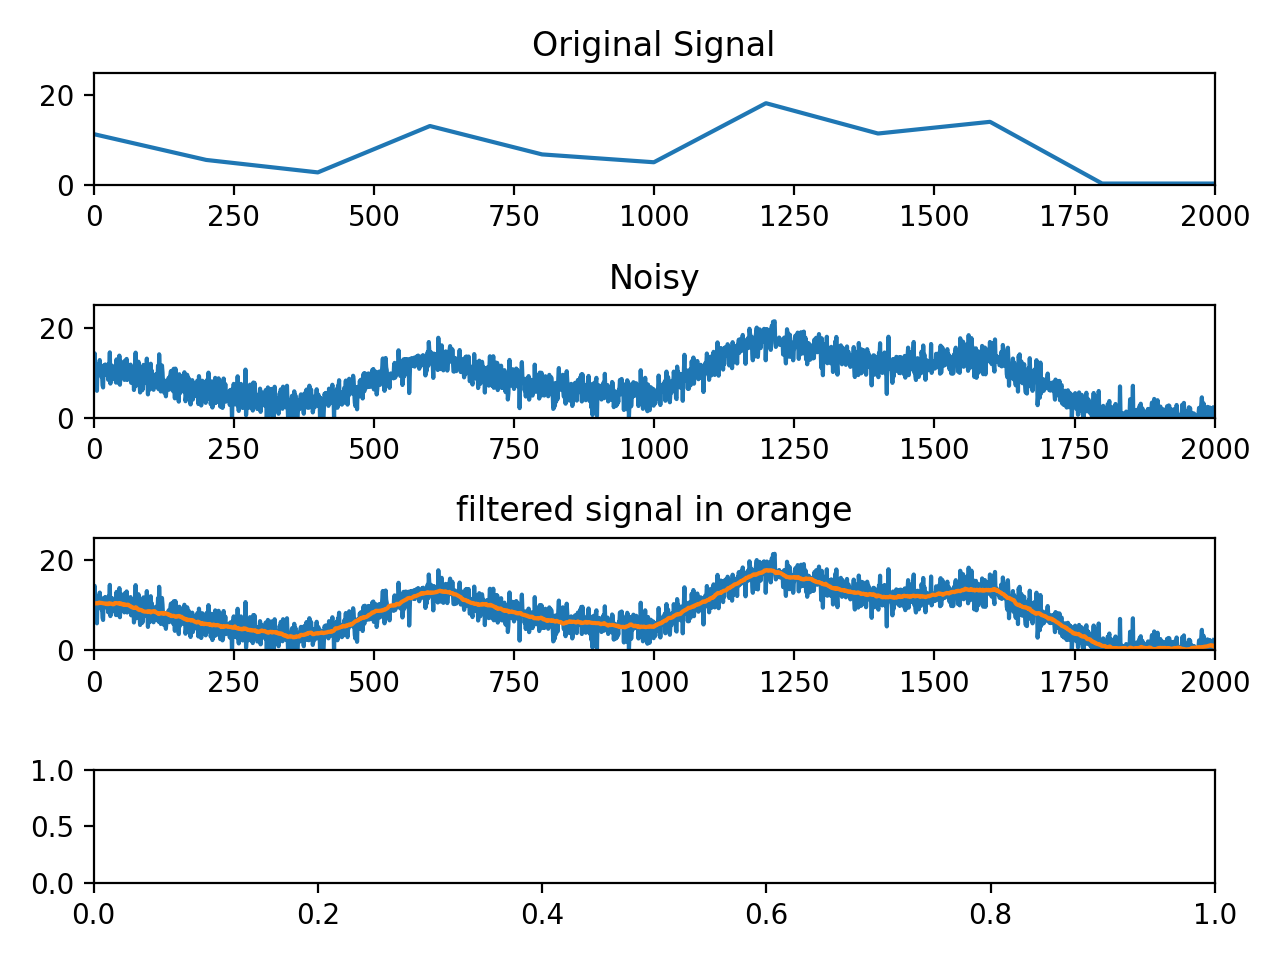

NameError: name 'x_axi2s' is not defined

In [79]:
# Assignment 2 - Smoothing Signals

# Part A
# set up relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,2,1/srate) # associated time vector that corresponds to 2 seconds
n     = len(time) # length of the time vector

# here is a base signal to work with, values of signal points chosen randomly
p     = 10 # points for piecewise linear signal
amp = 20   # amplitude range of base signal
base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)

# create some random noise to be added to the abve base signals
noiseamp = 2
noise  = noiseamp * np.random.randn(n)

# add noise to the base signals to create new noisy signals
noisy = np.add(noise, base)


# Plotting the original and noisy signals with a 2x1 subplot
# Defining the x-axis for subplots
                    
x_ax = np.arange(0, 2000, 1,dtype=int)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_tight_layout(True)

ax1.set_title('Original Signal')
ax1.plot(x_ax, base)
ax1.set_xlim([0, 2000])
ax1.set_ylim([0,25])
                    
ax2.set_title('Noisy')
ax2.plot(x_ax, noisy)
ax2.set_xlim([0, 2000])
ax2.set_ylim([0,25])

# Part B
# implement the running mean filter with a for loop
filtsig1 = np.arange(0, 2000, 1, dtype=float)

k = 20
for i, val in enumerate(noisy):
    if k > i:
        filtsig1[i] = np.mean(noisy[0:i+k])
    elif i + k > 2000:
        filtsig1[i] = np.mean(noisy[i-k:])
    else:
        filtsig1[i] = np.mean(noisy[i-k:i+k])

ax3.set_title('filtered signal in orange')
ax3.plot(x_ax, noisy)
ax3.plot(x_ax, filtsig1)
ax3.set_xlim(0, 2000)
ax3.set_ylim(0, 25)


# Part C
# implement smoothing using convolution11
hfilt = np.ones(2 * k + 1)
hfilt = np.divide(hfilt, 2 * k + 1)
filtsig2 = np.convolve(base, hfilt, mode = 'full')
x_axis2 = np.arange(0, 2040, 1, dtype=float)
ax4.set_title('filtered signal 2 in orange')


plt.subplot(4, 1, 4)
plt.stem(x_axi2s, filtsig1)
plt.xlim([0, 2000])
plt.ylim([0, 25])
plt.title('Filtered Signal 2')
plt.xlabel('t w/ sr = 1000 hz')
plt.ylabel('Amp')



###  Discussion

Describe the differences in the results using the two methods and explain these differences in terms of system properties. Comment on how the results and plots change when you amplify the noise more and also change the value of k.  

The first method essentially takes an average over some window of time and sets the value centered at the window to that average. This method still doesn't necessarily remove all of the noise. The second method of convolution has a much greater ability to smooth out the signal, because it essentially fills in the gaps caused by noise by ramping the original noise signal over time. If you amplified the noise, the signal would become more noisy, but increasing the window size k would cause it to be smoothed over a greater region, and 